In [1]:
#making all the necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve , classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("leads.csv")

# 1. Data Inspection

In [3]:
#lets check the shape of dataframe
print("size of df is. : {} Rows and {} Columns".format(df.shape[0],df.shape[1]))

size of df is. : 9240 Rows and 37 Columns


In [4]:
#lets check whether there are any null values ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### Observation : There are a lot of columns with null values , lets check the null percentage

In [5]:
#checking null percentage
print(100*(df.isnull().sum()/df.shape[0]))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [6]:
#lets drop the columns where the null values are greater than 30%
for col in df.columns:
    if 100*(df[col].isnull().sum()/df.shape[0]) > 30:
        print("dropping ",col)
        df.drop(col,axis=1,inplace=True)

dropping  Tags
dropping  Lead Quality
dropping  Asymmetrique Activity Index
dropping  Asymmetrique Profile Index
dropping  Asymmetrique Activity Score
dropping  Asymmetrique Profile Score


In [7]:
#checking nulls again
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#lets chack the value counts inside some of the columns
suspected_cols=['Country','City','How did you hear about X Education','Lead Profile','What matters most to you in choosing a course']

for col in suspected_cols:
    print("####################")
    print(col)
    print(df[col].value_counts(normalize=True))

####################
Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
South Africa            0.000590
Canada                  0.000590
Germany                 0.000590
Kuwait                  0.000590
Nigeria                 0.000590
Sweden                  0.000443
Uganda                  0.000295
China                   0.000295
Belgium                 0.000295
Italy                   0.000295
Asia/Pacific Region     0.000295
Netherlands             0.000295
Philippines             0.000295
Bangladesh              0.000295
Ghana                   0.000295
Kenya                   0.000148
Vietnam       

#### Observation :

#### 1 . For the column country  , about 95% values are India . This won'y help in our analysis as it doesn't brings in any variance into the dataset .

#### 2 . For the  column city majority of values are Mumbai and about 28% data is select which represents missing data .

#### 3 . For the Leads Profile , How did you hear about X education we can a lot of values which are "select" about 63% and 71% respectively .

#### 4. For the column what matters most to you in choosing the course about 99% values are Better Career Prospects  ,  since most of the values are same , this column doesnot brings in any variance necessary for our analysis .

#### hence we should drop these columns , as they are of no use .

In [9]:
df.drop(suspected_cols,inplace=True, axis=1)

In [10]:
#lets check for null again
df.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Specialization                              1438
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

In [11]:
#occupation details might be necessary for our model  so lets drop the rows where occupation is null
df=df[pd.notnull(df['What is your current occupation'])]

In [12]:
#lets check for null again
df.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 130
Total Time Spent on Website                   0
Page Views Per Visit                        130
Last Activity                               103
Specialization                               18
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses  

In [13]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [14]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [15]:
#copying non null rows for TotalVisits

df=df[pd.notnull(df['TotalVisits'])]

In [16]:
df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [17]:
# copying non null rows for Lead Source
df=df[pd.notnull(df['Lead Source'])]

In [18]:
df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [19]:
#copying non null rows for specialisation

df=df[pd.notnull(df['Specialization'])]

In [20]:
# checking the value again
df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [21]:
df.shape

(6373, 14)

#### Observation  : Initially we had about  9240 records  , where as after processing of the null values  we are left with 6373 records .It means we have lost about 30% of the data during our initial processing and  we are only left with 70% of data for our further analysis .

In [22]:
#lets drop the remaining un necessary columns
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [23]:
df.describe(include='all')

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
count,6373,6373,6373,6373.000000,6373.000000,6373.000000,6373.000000,6373,6373,6373,6373,6373
unique,4,16,2,NaN,NaN,NaN,NaN,16,19,6,2,14
top,Landing Page Submission,Google,No,NaN,NaN,NaN,NaN,Email Opened,Select,Unemployed,No,Email Opened
freq,3625,2048,5938,NaN,NaN,NaN,NaN,2455,1838,5476,4202,2038
mean,NaN,NaN,NaN,0.480935,3.624196,535.224541,2.480464,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.499676,5.048555,565.374753,2.167364,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,1.000000,34.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,3.000000,287.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,5.000000,1022.000000,3.500000,NaN,NaN,NaN,NaN,NaN


#### Observation :  looks like we have about 8 categorical variables and 4 numerical variables including the dependent variables

# 2. EDA 

<Figure size 720x360 with 0 Axes>

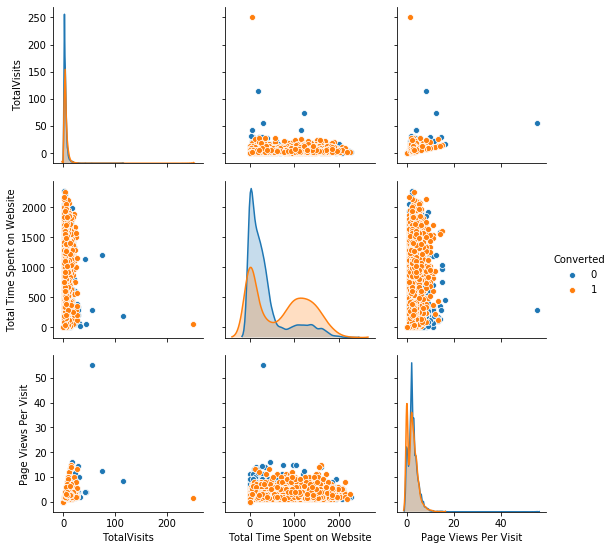

In [24]:
#lets visualize the correlation using pairplot and heatmaps
plt.figure(figsize=(10,5))
sns.pairplot(df,hue='Converted')
plt.show()

In [25]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

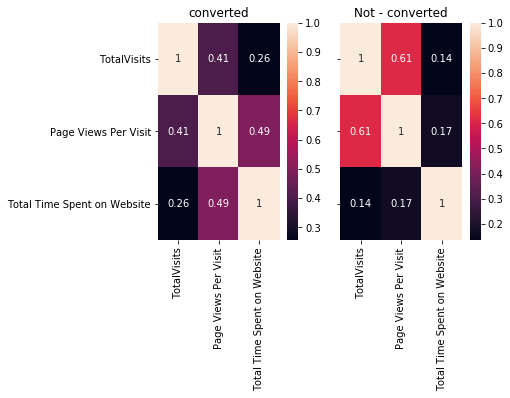

In [26]:
# making a heatmap

numeric_cols=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
plt.figure(figsize=(10,10))
df_1=df[df['Converted']==1]
df_2=df[df['Converted']==0]
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
sns.heatmap(df_1[numeric_cols].corr(),ax=ax1,annot=True)
ax1.title.set_text("converted")
sns.heatmap(df_2[numeric_cols].corr(),ax=ax2,annot=True)
ax2.title.set_text("Not - converted")

#### Observation : We can see some positive amount of correlation between Page view per and Total Time Spent On Website for converted folks . Whereas we can see strong correlation between total visits and  Page Views Per Visit for not converted customers .

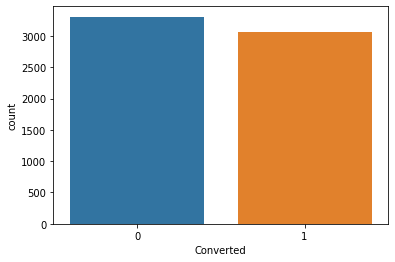

In [27]:
sns.countplot('Converted',data=df)
plt.show()

#### Observation :  The class counts are almost in the similar range.  

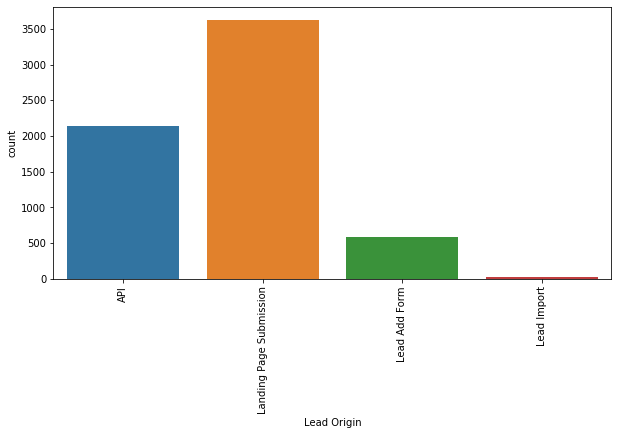

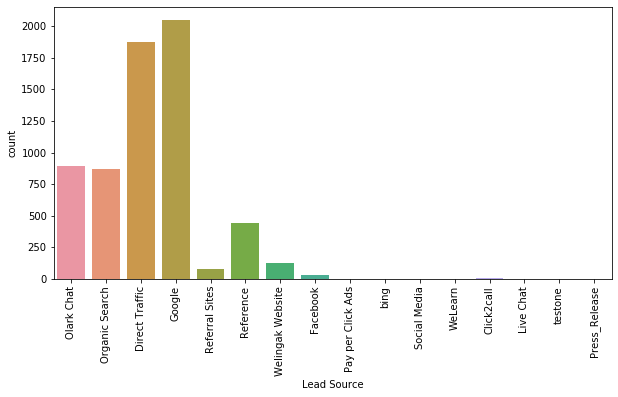

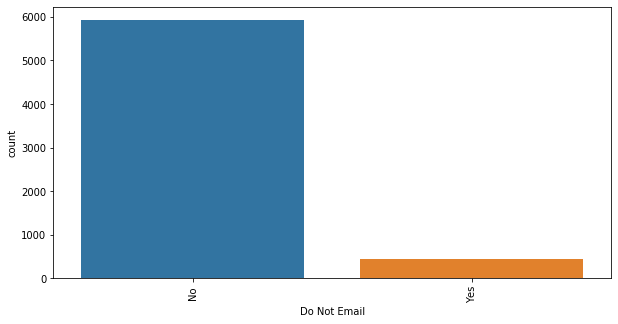

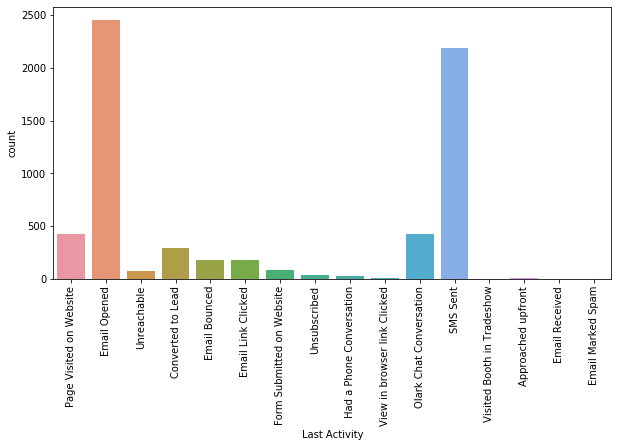

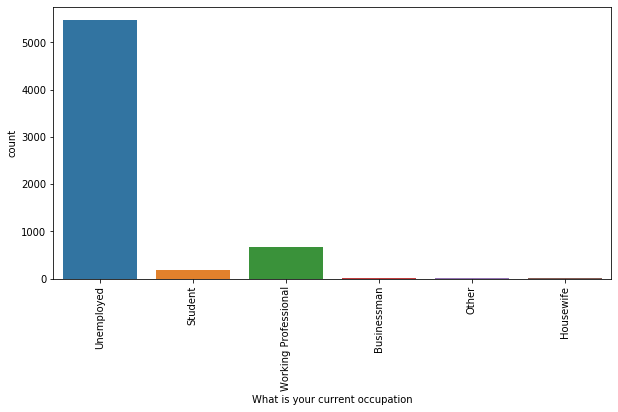

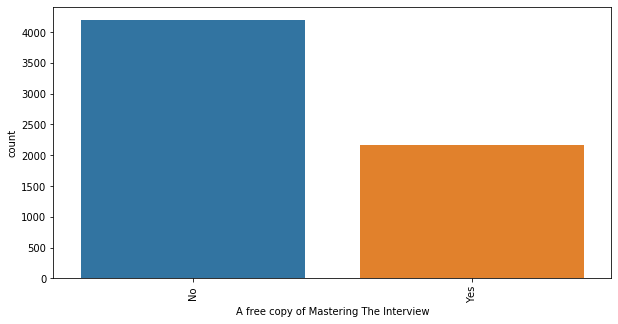

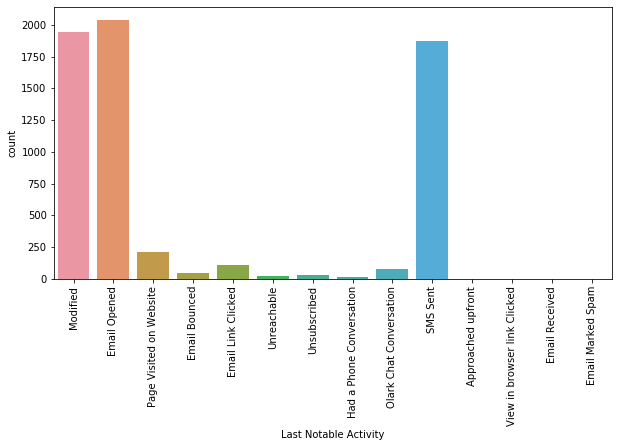

In [28]:
categorical_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']


for col in categorical_cols:
    plt.figure(figsize=(10,5))    
    sns.countplot(col,data=df)
    plt.xticks(rotation=90)
    plt.show()

#### Observation :
#### 1  Most of the people voted "NO" for A free copy of Mastering the Interview
#### 2 Email Opened , Modified and SMS Sent have large counts  for the Last notable activity .
#### 3 Most of the people in the dataset (5000+) are unemployed
#### 4 Lead Source  are mostly coming from Google , Direc Traffic , Olark Chat , Organic Search etc (decreasing order of lead counts)


# 3. Data Preparation

In [29]:
#Converting Categorical columns to numerical , by using one hot encoding since the variables are  Nominal in nature
categorical_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization']

for col in categorical_cols:
    if col == 'Specialization':
        dummy=pd.get_dummies(df['Specialization'],prefix="Spec")
        dummy.drop(['Spec_Select'],axis=1 ,  inplace=True)
        df=pd.concat([df,dummy],axis=1)
    else:
        dummy=pd.get_dummies(df[col],prefix=col,drop_first=True)
        df=pd.concat([df,dummy],axis=1)

In [30]:
#dropping the original categorical cols
df.drop(categorical_cols,axis=1,inplace=True)

In [31]:
#lets check the shape of our dataframe
df.shape

(6373, 75)

In [32]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Spec_IT Projects Management,Spec_International Business,Spec_Marketing Management,Spec_Media and Advertising,Spec_Operations Management,Spec_Retail Management,Spec_Rural and Agribusiness,Spec_Services Excellence,Spec_Supply Chain Management,Spec_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#train test split
X=df.drop(['Converted'],axis=1)
y=df['Converted']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
# Since the numeric columns are in different scales we are performing scaling
scaler=MinMaxScaler()
X_train[numeric_cols]=scaler.fit_transform(X_train[numeric_cols])

In [36]:
#lets check the scaled values
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Spec_IT Projects Management,Spec_International Business,Spec_Marketing Management,Spec_Media and Advertising,Spec_Operations Management,Spec_Retail Management,Spec_Rural and Agribusiness,Spec_Services Excellence,Spec_Supply Chain Management,Spec_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4 . Model Building

In [37]:
# lets create a simple Logistic Regression model using RFE for 15 variables
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [38]:
# columns to consider according to RFE
feature_set=[]
for item in list(zip(X_train.columns, rfe.support_, rfe.ranking_)) :
    if item[1]:
        print(item[0])
        feature_set.append(item[0])


TotalVisits
Total Time Spent on Website
Lead Origin_Lead Add Form
Lead Source_Olark Chat
Lead Source_Reference
Lead Source_Welingak Website
Do Not Email_Yes
Last Activity_Had a Phone Conversation
Last Activity_SMS Sent
What is your current occupation_Housewife
What is your current occupation_Student
What is your current occupation_Unemployed
What is your current occupation_Working Professional
Last Notable Activity_Had a Phone Conversation
Last Notable Activity_Unreachable


In [39]:
X_train = X_train[feature_set]

In [40]:
# model 1 with 15 features
X_train_sm = sm.add_constant(X_train)
LR1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = LR1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Mon, 23 Nov 2020   Deviance:                       4145.5
Time:                        12:57:45   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [41]:
# lets also look at the Variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [VIF(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


#### Observation: Lead Source_Reference	 has really high P value and VIF. , so we can go ahead and drop it .

In [42]:
# drop Lead Source_Reference high p value and VIF
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [43]:
feature_set2=X_train.columns

In [44]:
LR2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
LR2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Mon, 23 Nov 2020   Deviance:                       4146.5
Time:                        12:57:45   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [45]:
# lets look at the VIF as well
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [VIF(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


#### Observation : the VIF values are looking good for all the variables but the variable "Last Activity_Had a Phone Conversation" has really high p value. . So let's go ahead and drop it

In [46]:
# dropping Last Activity_Had a Phone Conversation
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [47]:
feature_set3=X_train.columns

In [48]:
LR3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
LR3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Mon, 23 Nov 2020   Deviance:                       4152.2
Time:                        12:57:45   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

#### Observation :  Lets also drop the column "What is your current occupation_Housewife" because of high P value .

In [49]:
#dropping What is your current occupation_Housewife
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [50]:
feature_set4=X_train.columns

In [51]:
LR4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
LR4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Mon, 23 Nov 2020   Deviance:                       4156.7
Time:                        12:57:45   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

#### Observation : Finally we can remove the variable "What is your current occupation_Working Professional" due to high P value and create our final model

In [52]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)
feature_set5=X_train.columns.values
LR5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
result = LR5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Mon, 23 Nov 2020   Deviance:                       4158.1
Time:                        12:57:45   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [53]:
#Lets also look at the final VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [VIF(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


#### Observation :  All the VIF and P Values are looking good for the model, so we would finalize the  model . Next we should move ahead to evaluate the model .

# 5. Model Evaluation

In [54]:
#storing the predictions from the final adding , after adding the constant 
y_train_pred = result.predict(sm.add_constant(X_train))

In [55]:
#converting series to array
y_train_pred = y_train_pred.values.reshape(-1)

In [56]:
# creating a dataframe with 2 columns Converted (train labels) and Conversion Prob (predicted labels)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

In [57]:
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


#### Lets assume a default cut off threshold of 0.5 ,  we will simply keep the label as 1 if the value is greater than 0.5 else it would be 0

In [58]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the dataframe
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


In [59]:
# lets create the confusion matrix for the same
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]])

In [60]:
#checking for accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7886124187401928

AUC SCORE :  0.8609909091055469


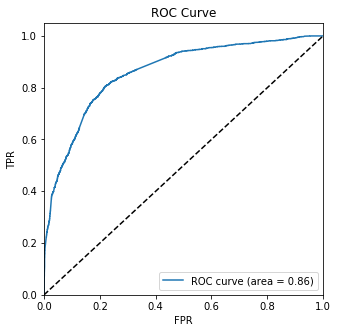

In [61]:
#ROC - AUC 
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,
                                              drop_intermediate = False )
auc_score = metrics.roc_auc_score(  y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob )
print("AUC SCORE : " , auc_score)
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### Inference : With ar arbitrary threshold value of 0.5 we have the following metrics
#### Accuracy : 78.8%
#### ROC - AUC : 0.86

In [62]:
#### Lets tweak the cut off point for a better  performance .

In [63]:
#creating multiple boundaries at an interval of 0.05 and generating class labels accordingly
boundaries=np.arange(0,1,0.05)
boundaries=[round(i,2) for i in boundaries]
for boundary in boundaries:
    y_train_pred_final[boundary]=y_train_pred_final['Conversion_Prob'].apply(lambda x : 1 if x > boundary else 0)

In [64]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.300117,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [65]:
# lets make  with metrics like accuracy , sensi and speci as columns and threshold probability as the index
result_df=pd.DataFrame(columns=['prob_cutoff','accuracy','sensi','speci'])
for boundary in boundaries:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[boundary] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    result_df.loc[boundary] =[ boundary ,accuracy,sensi,speci]

In [66]:
# lets have a look
result_df

,prob_cutoff,accuracy,sensi,speci
0.00,0.00,0.481731,1.000000,0.000000
0.05,0.05,0.505940,1.000000,0.046713
0.10,0.10,0.527012,0.994416,0.092561
0.15,0.15,0.634611,0.965100,0.327422
0.20,0.20,0.698274,0.944160,0.469723
0.25,0.25,0.724053,0.931131,0.531574
0.30,0.30,0.767541,0.865984,0.676038
0.35,0.35,0.784129,0.838530,0.733564
0.40,0.40,0.791975,0.810610,0.774654
0.45,0.45,0.787940,0.768730,0.805796


#### Inference : For our use case we  want to reduce the False Negatives  ( classifying some one as "not hot lead" ,  even if the customer actually was a hot lead and would have contributed to the revenue), hence we want to have a high value for Sensitivity , but on the other hand we want a descent accuracy 

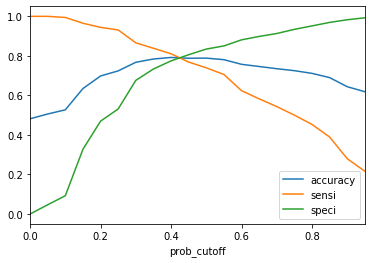

In [67]:
#plotting the graph
result_df.plot.line(x='prob_cutoff', y=['accuracy','sensi','speci'])
plt.show()

#### Observation :  we can find the optimal value of prbability cut off around 0.42 . Hence anything greater than 0.42 would belong to class 1 else it would belong to class 0.

In [68]:
#creating the final label
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.300117,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [69]:
#final accuracy after tweaking the threshold
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [70]:
# create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]])

In [71]:
# evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [72]:
print("Sensitivity : {0}\nSpecificity : {1}".format(TP/(TP+FN),TN/(TN+FP)))

Sensitivity : 0.793392275476966
Specificity : 0.7884948096885813


In [73]:
#full classification report  (precision ,  recall ,  f1-score)
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2312
           1       0.78      0.79      0.79      2149

    accuracy                           0.79      4461
   macro avg       0.79      0.79      0.79      4461
weighted avg       0.79      0.79      0.79      4461



## Model Evaluation on test set 

In [74]:
# perform scaling and load the features used in training the model
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test= X_test[feature_set5]

In [75]:
#lets have a look
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [76]:
#Add the connstant column
X_test_sm = sm.add_constant(X_test)

In [77]:
#predict using the final model
y_test_pred = result.predict(sm.add_constant(X_test))

In [78]:
#converting prediction probabilities to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [79]:
#actual labels to dataframe
y_test_df = pd.DataFrame(y_test)

In [80]:
#creating a dataframe with 3 columns actual , conversion probability , predicted (derived from probability)
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [81]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [82]:
#accuracy on test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7845188284518828

In [83]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [84]:
print("Sensitivity : {0}\nSpecificity : {1}".format(TP/(TP+FN),TN/(TN+FP)))

Sensitivity : 0.7794759825327511
Specificity : 0.7891566265060241


In [85]:
#full classification report  (precision ,  recall ,  f1-score)
print(classification_report(y_pred_final['Converted'],  y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       996
           1       0.77      0.78      0.78       916

    accuracy                           0.78      1912
   macro avg       0.78      0.78      0.78      1912
weighted avg       0.78      0.78      0.78      1912

